In [3]:
%matplotlib inline
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import BasicAer
import math

In [4]:
# 设置寄存器中的量子位的数量
n = 4  # 第一寄存器
m = 1  # 第二寄存器
# 用n个量子位创建一个量子寄存器
q = QuantumRegister(n+m, 'q')
# 在q寄存器上创建一个量子电路
register = QuantumCircuit(q)

In [11]:
# j=3,2,1,0
for j in range(n-1,-1,-1):
    register.h(q[j]) 
    register.cu1(math.pi/2,q[2],q[3],q[1]) 
    # 实际上是一个受控相位操作，能够看做一个单比特操作；相应电路见小黄书P165
    register.u1(math.pi/float(2**(j)), q[j])

AttributeError: 'QuantumCircuit' object has no attribute 'ccu1'

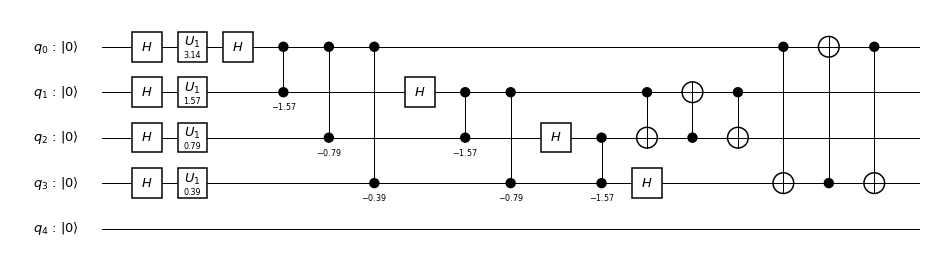

In [6]:
for j in range(n):
    for k in range(j):
        register.cu1(-math.pi/float(2**(j-k)), q[j], q[k]) 
    register.h(q[j])
def swap(qc, q, i, j):
    qc.cx(q[i], q[j])
    qc.cx(q[j], q[i])
    qc.cx(q[i], q[j])
if n%2==1:
    for i in range(int((n-1)/2)):
        swap(register, q, i, n-i-1)
else:
    for i in range(int(n/2)):
        swap(register, q, i, n-i-1)
register.draw(output="mpl")

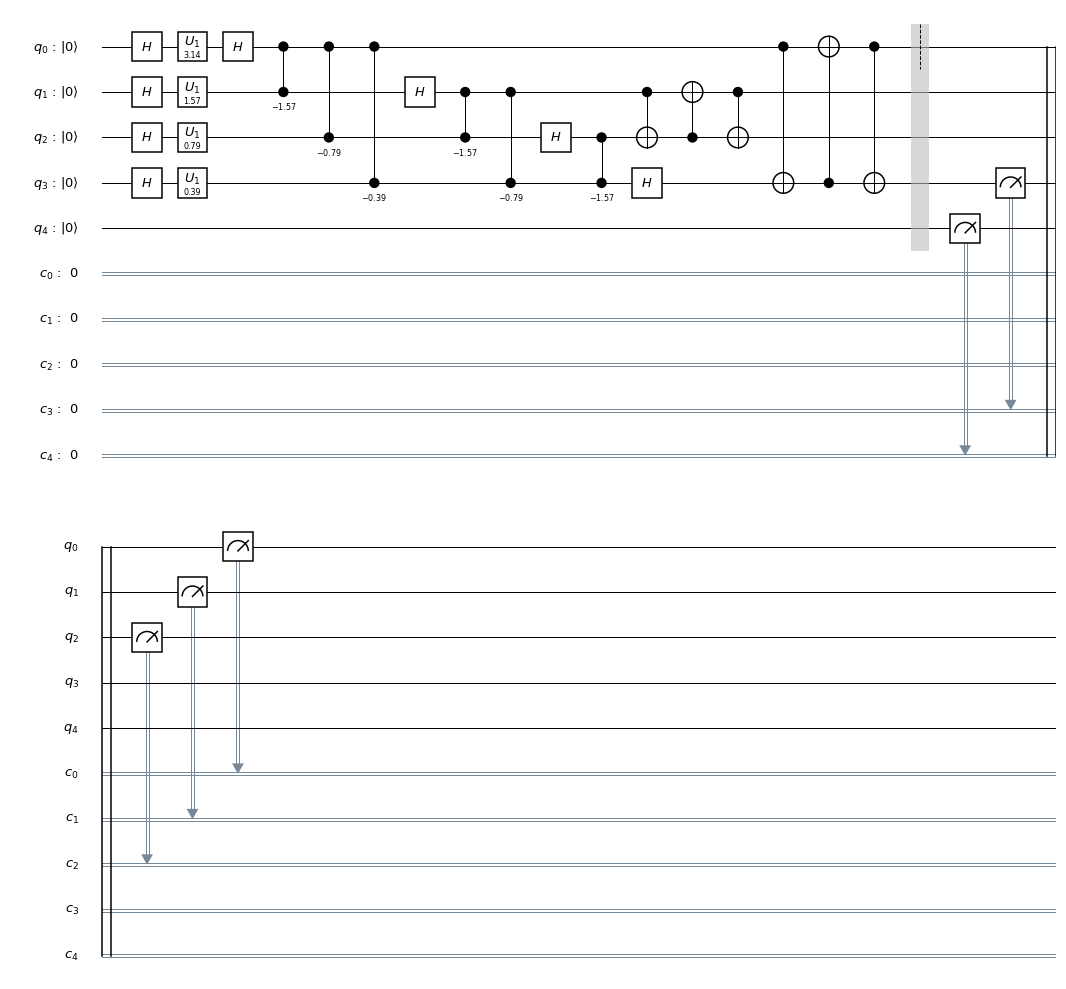

In [7]:
# Create a Classical Register with n bits.
c = ClassicalRegister(n+m, 'c')
# Create a Quantum Circuit
measure = QuantumCircuit(q, c)
measure.barrier(q)
# map the quantum measurement to the classical bits
measure.measure(q,c)

# The Qiskit circuit object supports composition using
# the addition operator.
qc = register+measure

#drawing the circuit
qc.draw(output="mpl")

In [8]:
# Use Aer's qasm_simulator
backend_sim = BasicAer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'01000': 1024}


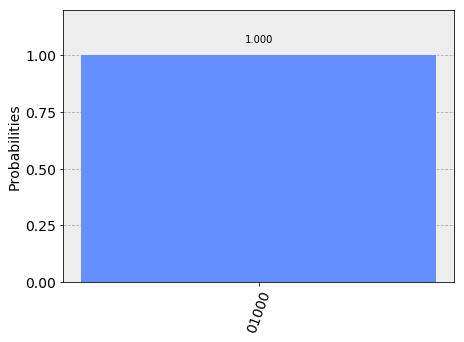

In [9]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result_sim.get_counts(qc))

In [1]:
import numpy as np
1.38148766/(2*np.sqrt(2))

0.48842964625576774